## Machine Learning 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

animal_data = pd.read_csv('data_state_class.csv')
animal_data = animal_data.drop(['Unnamed: 0'], axis = 1)
animal_data.head()

animal_data.head()

,weight,hapM,age,neuterN,neuterU,neuterY,dog,cat,kindETC,items,bad,state
0,0.9,7.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,AD
1,4.2,7.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,PR
2,0.3,6.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,ND
3,3.0,6.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,RE
4,5.0,3.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,AD


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_all = animal_data.drop(['state'], axis = 1)
y_all = animal_data['state']

In [4]:
X_train_A, X_final_test, y_train_A, y_final_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 101)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_train_A, y_train_A, test_size = 0.2, random_state = 100)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_prediction = logistic_model.predict(X_test)

print(classification_report(y_test, logistic_prediction))
print(confusion_matrix(y_test, logistic_prediction))

             precision    recall  f1-score   support

         AD       0.38      0.60      0.47      6644
         ED       0.33      0.27      0.30      4119
         ND       0.53      0.55      0.54      5399
         PR       0.00      0.00      0.00      1382
         RE       0.38      0.24      0.30      3064
          X       0.00      0.00      0.00       660

avg / total       0.37      0.41      0.38     21268

[[3956  806 1458    0  424    0]
 [2094 1112  470    0  443    0]
 [1598  593 2959    0  249    0]
 [ 854  173  301    0   54    0]
 [1580  629  106    0  749    0]
 [ 245   63  324    0   28    0]]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)

print(classification_report(y_test, knn_prediction))
print(confusion_matrix(y_test, knn_prediction))

             precision    recall  f1-score   support

         AD       0.38      0.38      0.38      6644
         ED       0.27      0.27      0.27      4119
         ND       0.42      0.44      0.43      5399
         PR       0.14      0.14      0.14      1382
         RE       0.25      0.25      0.25      3064
          X       0.10      0.09      0.09       660

avg / total       0.33      0.33      0.33     21268

[[2495 1158 1477  419  901  194]
 [1101 1101  888  254  691   84]
 [1371  799 2384  266  418  161]
 [ 409  269  300  190  184   30]
 [ 923  702  409  183  766   81]
 [ 200   73  217   39   71   60]]


In [10]:
knn_error_rate = []

for i in range(1, 51):
    knn_upgraded_model = KNeighborsClassifier(n_neighbors=i)
    knn_upgraded_model.fit(X_train, y_train)
    i_knn_model = knn_upgraded_model.predict(X_test)
    knn_error_rate.append(np.mean(i_knn_model != y_test))
    if i % 10 == 0:
        print('test number : ', i)

100 th test
200 th test
300 th test
400 th test


Text(0,0.5,'Error Rate')

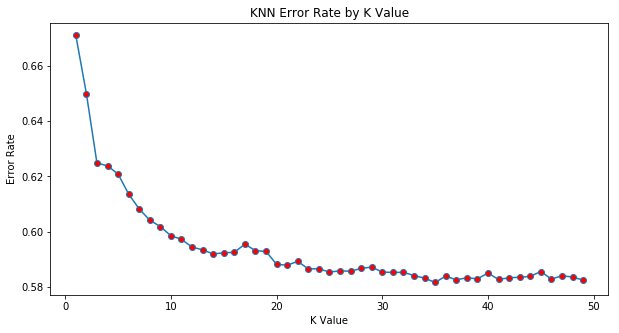

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(range(1, 51), knn_error_rate, marker = 'o', markerfacecolor = 'red')
plt.title('KNN Error Rate by K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [14]:
knn_error_rate.index(min(knn_error_rate)) + 1
# find minimum error rate K Value

35

In [15]:
knn_final_model = KNeighborsClassifier(n_neighbors=35)
knn_final_model.fit(X_train, y_train)
knn_final_prediction = knn_final_model.predict(X_test)

print('With K Value = 35')
print(classification_report(y_test, knn_final_prediction))
print(confusion_matrix(y_test, knn_final_prediction))

With K Value = 35
             precision    recall  f1-score   support

         AD       0.40      0.58      0.47      6644
         ED       0.34      0.32      0.33      4119
         ND       0.54      0.53      0.54      5399
         PR       0.30      0.05      0.09      1382
         RE       0.35      0.25      0.29      3064
          X       0.00      0.00      0.00       660

avg / total       0.40      0.42      0.40     21268

[[3848  966 1222   68  539    1]
 [1689 1334  585   36  475    0]
 [1615  602 2883   45  254    0]
 [ 717  242  262   70   91    0]
 [1417  714  157   14  762    0]
 [ 291   67  261    1   40    0]]
